In [278]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [279]:
highway_data = pd.read_csv("CS_Highway.csv")

In [280]:
highway_data.head()

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70


In [281]:
# discarding the last row
highway_data = highway_data.iloc[:-1,:] 


In [282]:
Sanc_charging_sta=pd.read_csv("CS_Sanctioned.csv")

In [283]:
Sanc_charging_sta.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207


In [284]:
Sanc_charging_sta = Sanc_charging_sta.iloc[:-1,:] 

In [291]:
#This function helps to get the required data
def get_data(df):
    
    d_mh = pd.read_excel(df,skiprows = [0,1]) # skipping first 2 rows
    d_mh.rename(columns=d_mh.iloc[0], inplace = True) # renaming 1st column
    d_mh = d_mh.iloc[1:,1:]
    d_mh.rename(columns = { d_mh.columns[0]:"Vehicle Class"}, inplace = True)
    #d_mh.rename(columns = { 'Vehicle Class':"Vehicle Class"}, inplace = True)
    
    d_mh = d_mh[["Vehicle Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]] # selecting main fuel types
    return d_mh

In [293]:
l=get_data('type_AP.xlsx')


In [313]:
l.drop(l.columns[1],axis=1,inplace=True)

In [314]:
l

,DIESEL,ELECTRIC(BOV),PETROL
1,19,1,799
2,"71,906",1,174
3,"1,562",0,"1,219"
4,36,0,30
5,"4,305",0,0
6,8,0,6
7,2,0,0
8,"10,872",0,126
9,43,0,3
10,251,0,0


In [194]:
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

In [195]:

#    This function helps to plot the bar plot for various feature
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
   
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()           

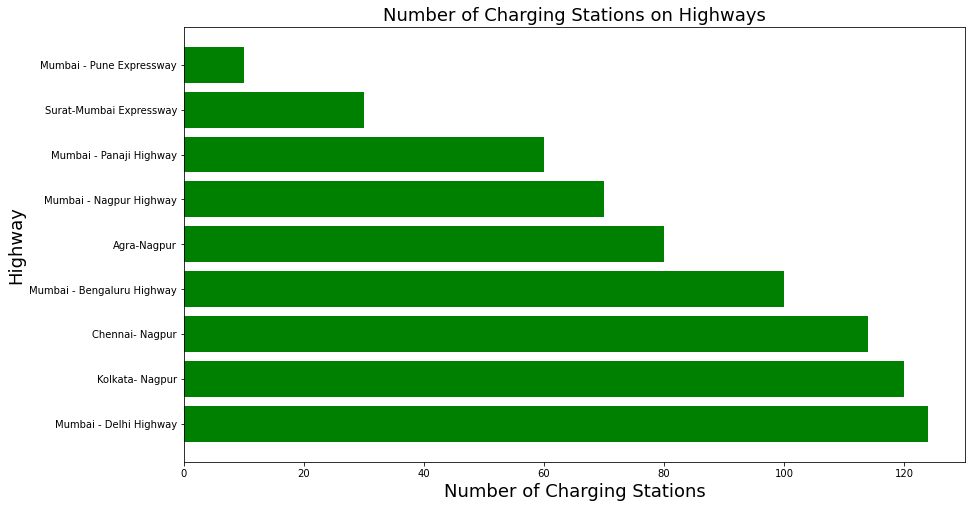

In [198]:
plot_frequency(highway_data,"Highways/Expressways","Charging Stations", "Number of Charging Stations",
               "Highway","Number of Charging Stations on Highways",'green')

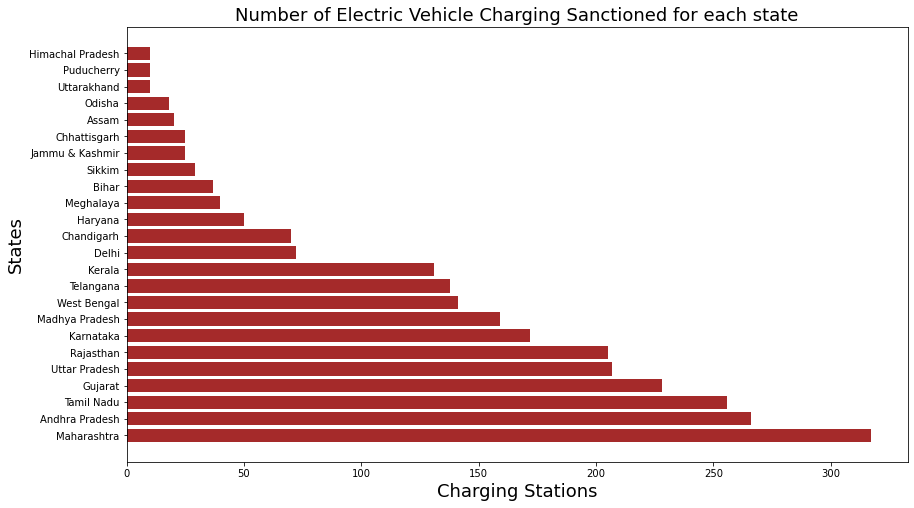

In [199]:
plot_frequency(Sanc_charging_sta,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','brown')


In [228]:
def get_all_data(state,state_name):
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle_Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["Vehicle Class","ELECTRIC(BOV)","State"]]

In [229]:
# list of name of csv files of every state
data_files = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]

In [230]:
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [231]:
concat_states = []
for i,j in zip(data_files,states):
    concat_states.append(get_all_data(i,j)) # calling the above defined function

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().